https://www.hindawi.com/journals/mse/2014/694185/

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#rule

# Design of Fuzzy Logic-Based Signal Controller Based on Traffic Urgency Degree

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Design of Fuzzy Logic-Based Signal Controller Based on Traffic Urgency Degree

Fuzzy logic-based signal controller based on traffic urgency includes the following two modules.
1. The traffic urgency degree evaluation module for red light phase: calculate traffic urgency degree for all of the red phase using the traffic urgency evaluation module. Select the red light phase with large traffic urgency as the next phase to switch.
2. Decision module: get the current green phase green light time delay through fuzzy reasoning according to the vehicles number of the current green phase and the next green phase.

### Traffic Urgency Degree Evaluation Module for Red Light Phase

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership functions

# vehicles number of current red light phase, Qr
num_vehicles_red = ctrl.Antecedent(np.arange(0, 31, 1), 'num_vehicles_red')
# duration of red light since the last end of the green light, Tr
dur_red = ctrl.Antecedent(np.arange(0, 151, 1), 'dur_red')

# Auto-membership function population is possible with .automf(3, 5, or 7)
num_vehicles_red.automf(5)
dur_red.automf(5)

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


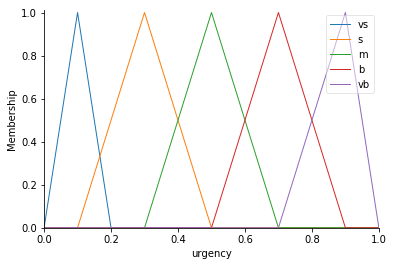

In [3]:
# traffic urgency of all current red light phase, Ur
urgency = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'urgency')

# Very Small, Small, Medium, Big, Very Big
urgency['vs'] = fuzz.trimf(urgency.universe, [0, 0.1, 0.2])
urgency['s'] = fuzz.trimf(urgency.universe, [0.1, 0.3, 0.5])
urgency['m'] = fuzz.trimf(urgency.universe, [0.3, 0.5, 0.7])
urgency['b'] = fuzz.trimf(urgency.universe, [0.5, 0.7, 0.9])
urgency['vb'] = fuzz.trimf(urgency.universe, [0.7, 0.9, 1])

urgency.view()

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


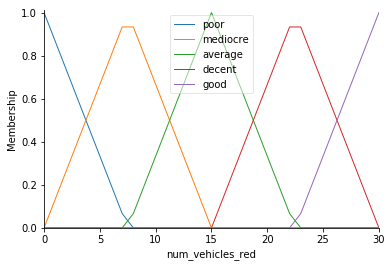

In [4]:
# You can see how these look with .view()
num_vehicles_red.view()

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


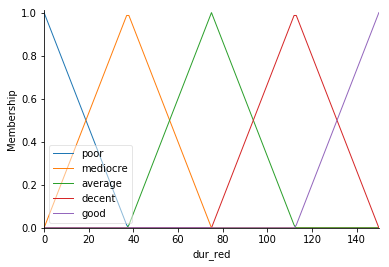

In [5]:
dur_red.view()

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


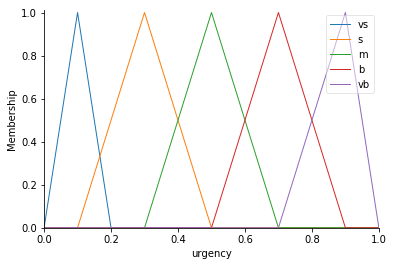

In [6]:
urgency.view()

#### Fuzzy rules

If the queue number of current red light phase is very short and the light duration of current red light phase is very short, so the urgency degree of current red light phase is very small.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd18b2e6a90>)

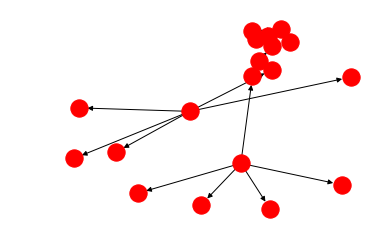

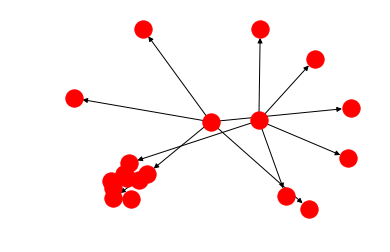

In [7]:
rule1 = ctrl.Rule(num_vehicles_red['poor'] & dur_red['poor'], urgency['vs'])
rule2 = ctrl.Rule(num_vehicles_red['mediocre'] & dur_red['poor'], urgency['vs'])
rule3 = ctrl.Rule(num_vehicles_red['average'] & dur_red['poor'], urgency['m'])
rule4 = ctrl.Rule(num_vehicles_red['decent'] & dur_red['poor'], urgency['b'])
rule5 = ctrl.Rule(num_vehicles_red['good'] & dur_red['poor'], urgency['b'])

rule6 = ctrl.Rule(num_vehicles_red['poor'] & dur_red['mediocre'], urgency['vs'])
rule7 = ctrl.Rule(num_vehicles_red['mediocre'] & dur_red['mediocre'], urgency['s'])
rule8 = ctrl.Rule(num_vehicles_red['average'] & dur_red['mediocre'], urgency['s'])
rule9 = ctrl.Rule(num_vehicles_red['decent'] & dur_red['mediocre'], urgency['m'])
rule10 = ctrl.Rule(num_vehicles_red['good'] & dur_red['mediocre'], urgency['m'])

rule11 = ctrl.Rule(num_vehicles_red['poor'] & dur_red['average'], urgency['s'])
rule12 = ctrl.Rule(num_vehicles_red['mediocre'] & dur_red['average'], urgency['s'])
rule13 = ctrl.Rule(num_vehicles_red['average'] & dur_red['average'], urgency['m'])
rule14 = ctrl.Rule(num_vehicles_red['decent'] & dur_red['average'], urgency['m'])
rule15 = ctrl.Rule(num_vehicles_red['good'] & dur_red['average'], urgency['b'])

rule16 = ctrl.Rule(num_vehicles_red['poor'] & dur_red['decent'], urgency['s'])
rule17 = ctrl.Rule(num_vehicles_red['mediocre'] & dur_red['decent'], urgency['m'])
rule18 = ctrl.Rule(num_vehicles_red['average'] & dur_red['decent'], urgency['m'])
rule19 = ctrl.Rule(num_vehicles_red['decent'] & dur_red['decent'], urgency['b'])
rule20 = ctrl.Rule(num_vehicles_red['good'] & dur_red['decent'], urgency['vb'])

rule21 = ctrl.Rule(num_vehicles_red['poor'] & dur_red['good'], urgency['m'])
rule22 = ctrl.Rule(num_vehicles_red['mediocre'] & dur_red['good'], urgency['m'])
rule23 = ctrl.Rule(num_vehicles_red['average'] & dur_red['good'], urgency['b'])
rule24 = ctrl.Rule(num_vehicles_red['decent'] & dur_red['good'], urgency['vb'])
rule25 = ctrl.Rule(num_vehicles_red['good'] & dur_red['good'], urgency['vb'])

rule1.view()
rule2.view()

#### Control System Creation and Simulation

In [8]:
for i in range(1,26):
    print('rule'+str(i), end=', ')

rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, 

In [9]:
urgency_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                   rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, 
                                   rule20, rule21, rule22, rule23, rule24, rule25])

urgency_degree = ctrl.ControlSystemSimulation(urgency_ctrl)

In [10]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
urgency_degree.input['num_vehicles_red'] = 25
urgency_degree.input['dur_red'] = 9

# Crunch the numbers
urgency_degree.compute()

0.6388488238449161


/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


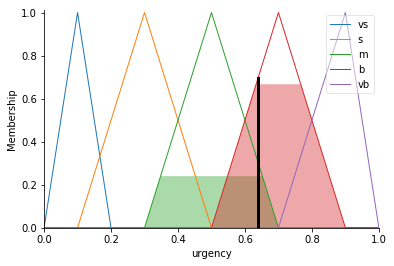

In [11]:
print (urgency_degree.output['urgency'])
urgency.view(sim=urgency_degree)

###  Decision Module for Delay Time of the Current Green Light Phase

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


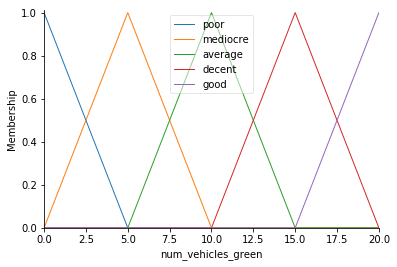

In [12]:
# vehicles number of current green light phase
num_vehicles_green = ctrl.Antecedent(np.arange(0, 21, 1), 'num_vehicles_green')
num_vehicles_green.automf(5)
num_vehicles_green.view()

/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


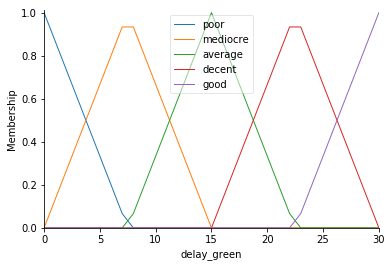

In [13]:
delay_green = ctrl.Consequent(np.arange(0, 31, 1), 'delay_green')
delay_green.automf(5)
delay_green.view()

#### Fuzzy rules

If the queue number of current green light phase is very short and the queue number of next green light phase is short, so the delay time of current green light phase is very small.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd18b114438>)

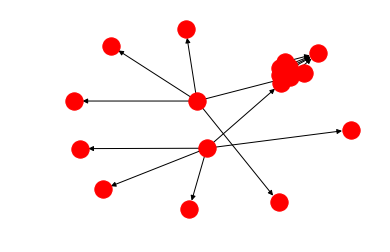

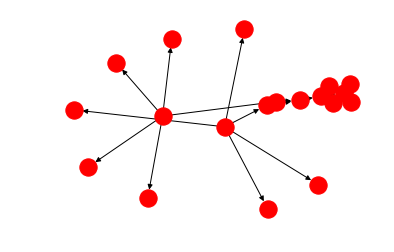

In [14]:
rule1 = ctrl.Rule(num_vehicles_green['poor'] & num_vehicles_red['poor'], delay_green['poor'])
rule2 = ctrl.Rule(num_vehicles_green['mediocre'] & num_vehicles_red['poor'], delay_green['mediocre'])
rule3 = ctrl.Rule(num_vehicles_green['average'] & num_vehicles_red['poor'], delay_green['average'])
rule4 = ctrl.Rule(num_vehicles_green['decent'] & num_vehicles_red['poor'], delay_green['decent'])
rule5 = ctrl.Rule(num_vehicles_green['good'] & num_vehicles_red['poor'], delay_green['good'])

rule6 = ctrl.Rule(num_vehicles_green['poor'] & num_vehicles_red['mediocre'], delay_green['poor'])
rule7 = ctrl.Rule(num_vehicles_green['mediocre'] & num_vehicles_red['mediocre'], delay_green['mediocre'])
rule8 = ctrl.Rule(num_vehicles_green['average'] & num_vehicles_red['mediocre'], delay_green['average'])
rule9 = ctrl.Rule(num_vehicles_green['decent'] & num_vehicles_red['mediocre'], delay_green['decent'])
rule10 = ctrl.Rule(num_vehicles_green['good'] & num_vehicles_red['mediocre'], delay_green['good'])

rule11 = ctrl.Rule(num_vehicles_green['poor'] & num_vehicles_red['average'], delay_green['poor'])
rule12 = ctrl.Rule(num_vehicles_green['mediocre'] & num_vehicles_red['average'], delay_green['mediocre'])
rule13 = ctrl.Rule(num_vehicles_green['average'] & num_vehicles_red['average'], delay_green['average'])
rule14 = ctrl.Rule(num_vehicles_green['decent'] & num_vehicles_red['average'], delay_green['decent'])
rule15 = ctrl.Rule(num_vehicles_green['good'] & num_vehicles_red['average'], delay_green['decent'])

rule16 = ctrl.Rule(num_vehicles_green['poor'] & num_vehicles_red['decent'], delay_green['poor'])
rule17 = ctrl.Rule(num_vehicles_green['mediocre'] & num_vehicles_red['decent'], delay_green['poor'])
rule18 = ctrl.Rule(num_vehicles_green['average'] & num_vehicles_red['decent'], delay_green['average'])
rule19 = ctrl.Rule(num_vehicles_green['decent'] & num_vehicles_red['decent'], delay_green['average'])
rule20 = ctrl.Rule(num_vehicles_green['good'] & num_vehicles_red['decent'], delay_green['decent'])

rule21 = ctrl.Rule(num_vehicles_green['poor'] & num_vehicles_red['decent'], delay_green['poor'])
rule22 = ctrl.Rule(num_vehicles_green['mediocre'] & num_vehicles_red['decent'], delay_green['poor'])
rule23 = ctrl.Rule(num_vehicles_green['average'] & num_vehicles_red['decent'], delay_green['mediocre'])
rule24 = ctrl.Rule(num_vehicles_green['decent'] & num_vehicles_red['decent'], delay_green['average'])
rule25 = ctrl.Rule(num_vehicles_green['good'] & num_vehicles_red['decent'], delay_green['decent'])

rule1.view()
rule2.view()

#### Control System Creation and Simulation

In [15]:
delay_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, 
                                   rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, 
                                   rule20, rule21, rule22, rule23, rule24, rule25])

delay_time = ctrl.ControlSystemSimulation(delay_ctrl)

In [16]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
delay_time.input['num_vehicles_red'] = 25
delay_time.input['num_vehicles_green'] = 9

# Crunch the numbers
delay_time.compute()

11.114285714285714


/home/hectoryee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


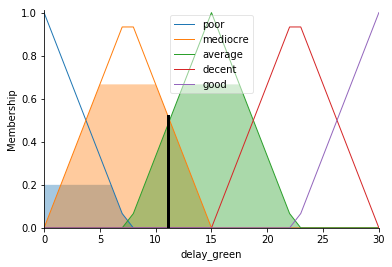

In [17]:
print (delay_time.output['delay_green'])
delay_green.view(sim=delay_time)